<a href="https://colab.research.google.com/github/lukitasmois/2162-clasificacion-validacion-de-modelos-y-metricas/blob/main/Clasificacion_validacion_y_metricas_desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>
## 💪 Practica 💪

## 01.11 - Clasificacion de datos

Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este [enlace](https://raw.githubusercontent.com/lukitasmois/2162-clasificacion-validacion-de-modelos-y-metricas/refs/heads/main/diabetes.csv).

### 01.11.01. Preparativo de los datos

Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con `pandas`.

#### Importo los datos

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('https://raw.githubusercontent.com/lukitasmois/2162-clasificacion-validacion-de-modelos-y-metricas/refs/heads/main/diabetes.csv')
datos.head()

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


#### Divido los datos en las variables explicativas y de respuesta

In [3]:
X = datos.drop(columns='diabetes')
y = datos.diabetes

### 01.11.02. Division de los datos de entrenamiento, validacion y prueba

Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro `stratify` a partir de la variable objetivo para mantener la proporción de los datos.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size= 0.05, stratify=y)
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size= 0.25, stratify=y)

### 01.11.03. Creacion del modelo

La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos `DecisionTreeClassifier` y `RandomForestClassifier` y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro `max_depth` del algoritmo `DecisionTreeClassifier` y el valor 2 para el `max_depth` del algoritmo `RandomForestClassifier`, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=101)
modelo_forest = RandomForestClassifier(max_depth=2, random_state=101)

In [8]:
lista_modelos = [('modelo en arbol',modelo_arbol), ('modelo forest',modelo_forest)]

In [9]:
for i in lista_modelos:
  i[1].fit(X_train, y_train)

In [10]:
for i in lista_modelos:
  print(f'Resultado de evaluacion del {i[0]}: {i[1].score(X_val, y_val)}')

Resultado de evaluacion del modelo en arbol: 0.6868686868686869
Resultado de evaluacion del modelo forest: 0.696969696969697


### 01.11.04. Entender el comportamiento

La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método `predict` para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [12]:
y_predict_arbol = modelo_arbol.predict(X_val)
y_predict_bosque = modelo_forest.predict(X_val)

In [13]:
matriz_arbol = confusion_matrix(y_val, y_predict_arbol)
matriz_bosque = confusion_matrix(y_val, y_predict_bosque)

lista_matrices = [matriz_arbol, matriz_bosque]

In [14]:
for matriz in lista_matrices:
  print('---------')
  print(matriz)

---------
[[45 21]
 [10 23]]
---------
[[59  7]
 [23 10]]


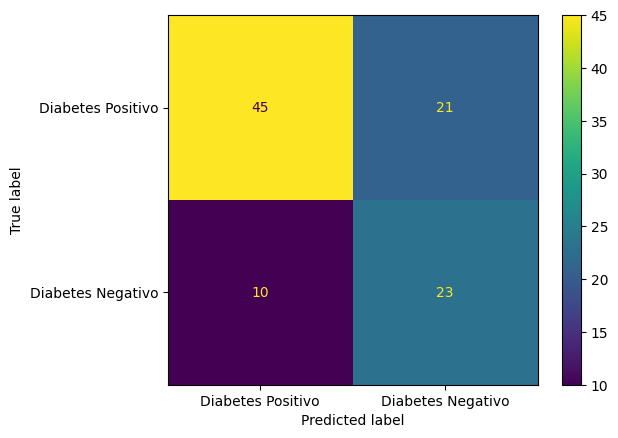

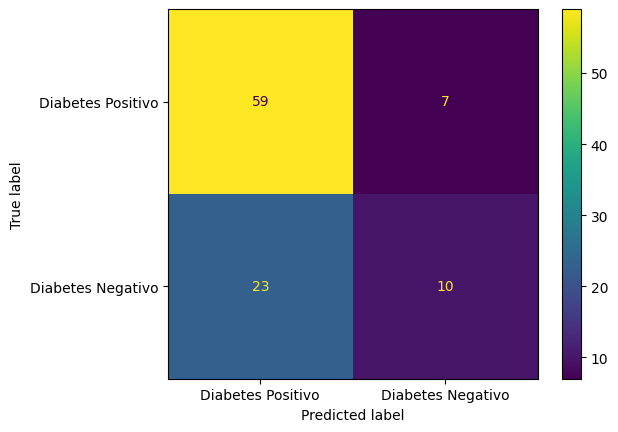

In [15]:
for matriz in lista_matrices:
  visualizer = ConfusionMatrixDisplay(matriz, display_labels=['Diabetes Positivo', 'Diabetes Negativo'])
  visualizer.plot();

## 02.09 - Metricas de evaluacion

Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero usando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este [enlace](https://github.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/blob/desafios/diabetes.csv).

Estos desafíos dependen del modelo generado en los desafíos de la clase 1.

Como consejo, revisa la documentación de `Scikit-learn` desde este [enlace](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) y verifica una forma de presentar los resultados de las curvas en el mismo gráfico usando matplotlib.

### 02.09.01. Exploracion de metricas

Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, exactitud y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [18]:
print(f'La presicion del modelo bosque es de: {precision_score(y_val, y_predict_bosque)}')
print(f'La sensibilidad (Recall) del modelo bosque es de: {recall_score(y_val, y_predict_bosque)}')
print(f'La exactitud del modelo arbol es de: {accuracy_score(y_val, y_predict_bosque)}')

La presicion del modelo bosque es de: 0.5882352941176471
La sensibilidad (Recall) del modelo bosque es de: 0.30303030303030304
La exactitud del modelo arbol es de: 0.696969696969697


In [19]:
print(f'El F1-Score del modelo arbol es: {f1_score(y_val, y_predict_bosque)}')

El F1-Score del modelo arbol es: 0.4


### 02.09.02. Curva ROC

Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método `RocCurveDisplay.from_predictions`.

In [20]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

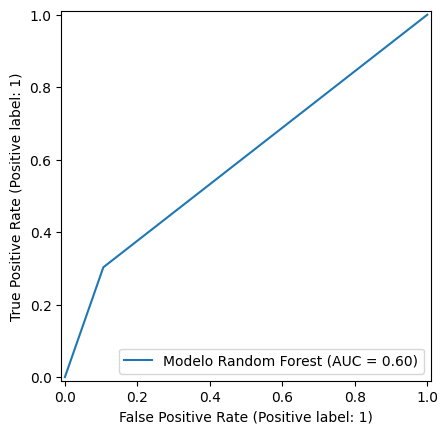

In [23]:
RocCurveDisplay.from_predictions(y_val, y_predict_bosque, name='Modelo Random Forest');

In [22]:
print(f'Evaluacion del modelo bosque a partir de la metrica AUC: {roc_auc_score(y_val, y_predict_bosque)}')

Evaluacion del modelo bosque a partir de la metrica AUC: 0.5984848484848485


### 02.09.03. Curva de precision x recall

Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. Obtén la curva de precisión x recall y la métrica AP de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método `PrecisionRecallDisplay.from_predictions`.

### 02.09.04. Resumen de metricas

Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1. El informe de métricas se puede generar a partir de la función `classification_report` de la biblioteca `Scikit-Learn`.